In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import geopandas as gpd
%matplotlib inline

In [2]:
wa_puma = gpd.read_file('../../data/raw/tl_2017_53_puma10.shp') # We are loading the Washington map from a shape file. 
#This file shows us the dataframe for the contents of the map below. 
wa_puma.head()

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,53,10200,5310200,"Skagit, Island & San Juan Counties PUMA",G6120,S,5470622131,2441658886,+48.4470835,-122.1737477,"POLYGON ((-122.44422 48.64527, -122.43685 48.6..."
1,53,10100,5310100,Whatcom County--Bellingham City PUMA,G6120,S,5459332804,1028183246,+48.8426531,-121.8364325,"POLYGON ((-122.40642 49.00230, -122.40617 49.0..."
2,53,10400,5310400,"Stevens, Okanogan, Pend Oreille & Ferry Counti...",G6120,S,29389124389,489162432,+48.5031090,-118.7866777,"POLYGON ((-118.14859 47.88667, -118.14899 47.8..."
3,53,10504,5310504,Spokane County (Outer)--Cheney City PUMA,G6120,S,3983412021,35812133,+47.5972847,-117.1210417,"POLYGON ((-117.10528 47.61018, -117.10527 47.6..."
4,53,10503,5310503,Spokane County (East Central)--Greater Spokane...,G6120,S,270926976,5004332,+47.6561281,-117.1818649,"POLYGON ((-117.15534 47.69971, -117.15509 47.6..."


In [3]:
wa_puma.dtypes

STATEFP10       object
PUMACE10        object
GEOID10         object
NAMELSAD10      object
MTFCC10         object
FUNCSTAT10      object
ALAND10          int64
AWATER10         int64
INTPTLAT10      object
INTPTLON10      object
geometry      geometry
dtype: object

In [4]:
wa_puma['PUMACE10'] = wa_puma['PUMACE10'].astype(int)
wa_puma.dtypes

STATEFP10       object
PUMACE10         int64
GEOID10         object
NAMELSAD10      object
MTFCC10         object
FUNCSTAT10      object
ALAND10          int64
AWATER10         int64
INTPTLAT10      object
INTPTLON10      object
geometry      geometry
dtype: object

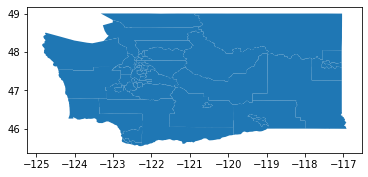

In [5]:
wa_puma.plot()
plt.show()

In [6]:
df_zips = pd.read_csv('../../data/raw/df_zip.csv', header=2)
# data = pd.read_html('https://www.zipcodestogo.com/Washington/') I tried with this but I couldn't make
# lxml work. Javi Knows what happen. My solution was to ask Naweed to convert the html file into a csv and
# he sent it to me. 
# https://www.zipcodestogo.com/Washington/
df_zips.head()

,1,Zip Code,City,County,Zip Code Map
0,2,98001,Auburn,King,View Map
1,3,98002,Auburn,King,View Map
2,4,98003,Federal Way,King,View Map
3,5,98004,Bellevue,King,View Map
4,6,98005,Bellevue,King,View Map


In [7]:
df_zips.drop(['1', 'Zip Code Map'], axis=1, inplace=True)

In [8]:
df_zips.head()

,Zip Code,City,County
0,98001,Auburn,King
1,98002,Auburn,King
2,98003,Federal Way,King
3,98004,Bellevue,King
4,98005,Bellevue,King


From [here](https://www.kingcounty.gov/depts/health/data/community-health-indicators/definitions.aspx) I get the South King County cities -> Auburn, Burien, Covington, Des Moines, Enumclaw, Federal Way, Kent, Maple Valley, Normandy Park, Renton, Tukwila, SeaTac, White Center/Boulevard Park, and Vashon Island.

In [9]:
df_zips = df_zips[df_zips.City.isin(['Auburn', 'Burien', 'Covington', 
                                   'Des Moines', 'Enumclaw', 'Federal Way', 'Kent', 'Maple Valley', 
                                   'Normandy Park', 'Renton', 'Tukwila', 'SeaTac', 'White Center', 'Vashion'])].reset_index(drop=True)
df_zips

,Zip Code,City,County
0,98001,Auburn,King
1,98002,Auburn,King
2,98003,Federal Way,King
3,98022,Enumclaw,King
4,98023,Federal Way,King
5,98030,Kent,King
6,98031,Kent,King
7,98032,Kent,King
8,98035,Kent,King
9,98038,Maple Valley,King


Now i have a list of all the zipcodes on South King County. The challenge now is to try to use the zipcodes and mapping them. I will need to find similarities with the dataframes I have got this from Naweed. He created a csv from an html for me. Just by looking at the zipcodes I cannot see anything very obvious. 

After playing with the database I have found a way with matching PUMAID's with TRCT ID's and in addition I have also found a way to match trct ID with zipcodes. I will be able to filter my map with PUMAs. 

In [10]:
tract_zip = pd.read_csv('../../data/processed/tract_zip.csv') #matching zcts with trcts for king county
tract_zip.head()

,zcta,trct
0,98019,53033032500
1,98224,53033032800
2,98032,53033029700
3,98168,53033027000
4,99999,53033990100


In [11]:
tract_puma = pd.read_csv('../../data/processed/trct_puma.csv', dtype=str) #the tractce was seen as an int and inorder for it to be seen as a string, 
#I needed to convert it so that I can match trct to tractce
tract_puma.head()

,statefp,countyfp,tractce,puma5ce
0,53,033,000300,11601
1,53,033,000401,11601
2,53,033,000402,11601
3,53,033,000500,11601
4,53,033,000600,11601


I have realised `trct` on the `tract_zip` dataframe, the 6 numbers are the same at the `tractce` in `tract_puma`. 

In [12]:
tract_zip['tractce'] = tract_zip['trct'].apply(lambda x: str(x)[-6:]) 
tract_zip.head()

,zcta,trct,tractce
0,98019,53033032500,032500
1,98224,53033032800,032800
2,98032,53033029700,029700
3,98168,53033027000,027000
4,99999,53033990100,990100


I reassigned the value for `tract_zip`
The reason why I did this is because I need to filter all of the zipcodes for South King county that was taken from `df_zips`
My goal is now take the above and match the tractce that falls within the South King County and filter it so that we can get the appropriate PUMAs. 


In [13]:
tract_zip_sk = tract_zip[tract_zip['zcta'].isin(df_zips['Zip Code'])]
tract_zip_sk.head()

,zcta,trct,tractce
2,98032,53033029700,029700
8,98032,53033028300,028300
9,98032,53033028300,028300
10,98032,53033028300,028300
13,98042,53033029307,029307


In [14]:
tract_zip.shape

(35831, 3)

In [15]:
tract_zip_sk.shape

(8587, 3)

I have filtered my zip tract to just south king county. You can see that the shape and rows have reduced in the data frame

In [16]:
tract_puma.head()

,statefp,countyfp,tractce,puma5ce
0,53,033,000300,11601
1,53,033,000401,11601
2,53,033,000402,11601
3,53,033,000500,11601
4,53,033,000600,11601


In [17]:
tract_puma_sk = tract_puma[tract_puma['tractce'].isin(tract_zip_sk['tractce'])]
pumas_sk = tract_puma_sk['puma5ce'].astype(int).unique().tolist()   
pumas_sk

[11609, 11610, 11611, 11612, 11613, 11614, 11615]

With the list of tract of South King County I was able to filter the `tract_puma` in order to get a ilst of the unique `pumas` of the South King County

We are going to create a new column called SKC that will show the pumas of just the South King County, if it exists it will say 0, otherwise 1. 

In [18]:
# All King County and Seattle
kc_puma = wa_puma.loc[(wa_puma.PUMACE10 >= 11601 ) & (wa_puma.PUMACE10 <= 11616)]
kc_puma.head()
# I have looked at the website and also at the data to double check whether some of these are within south king county
# Since some of them are not, I have narrowed it down to 11611-11615.

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
9,53,11612,5311612,"King County (Far Southwest)--Federal Way, Des ...",G6120,S,160638807,279665546,+47.4764651,-122.4271168,"POLYGON ((-122.33587 47.26382, -122.33676 47.2..."
32,53,11616,5311616,"King County (Northeast)--Snoqualmie City, Cott...",G6120,S,2477645989,49838932,+47.5779171,-121.6433869,"POLYGON ((-121.87736 47.50068, -121.87745 47.5..."
35,53,11611,5311611,"King County (West Central)--Burien, SeaTac, Tu...",G6120,S,104685305,6835973,+47.4500687,-122.3101564,"POLYGON ((-122.26541 47.48933, -122.26516 47.4..."
36,53,11605,5311605,Seattle City (West)--Duwamish & Beacon Hill PUMA,G6120,S,70104140,10124676,+47.5521279,-122.3523950,"POLYGON ((-122.32246 47.59583, -122.32147 47.5..."
37,53,11603,5311603,Seattle City (Downtown)--Queen Anne & Magnolia...,G6120,S,29279826,8323991,+47.6391415,-122.3720415,"POLYGON ((-122.32238 47.65293, -122.32234 47.6..."


In `kc_puma` we are creating a new column that shows that PUMA whether it is in South King County or not. Then we print the top of `kc_puma` to have a look at whether it worked. 

In [19]:
kc_puma['SKC'] = kc_puma.PUMACE10.isin(pumas_sk) 
kc_puma.head()

/opt/anaconda3/envs/oy-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,SKC
9,53,11612,5311612,"King County (Far Southwest)--Federal Way, Des ...",G6120,S,160638807,279665546,+47.4764651,-122.4271168,"POLYGON ((-122.33587 47.26382, -122.33676 47.2...",True
32,53,11616,5311616,"King County (Northeast)--Snoqualmie City, Cott...",G6120,S,2477645989,49838932,+47.5779171,-121.6433869,"POLYGON ((-121.87736 47.50068, -121.87745 47.5...",False
35,53,11611,5311611,"King County (West Central)--Burien, SeaTac, Tu...",G6120,S,104685305,6835973,+47.4500687,-122.3101564,"POLYGON ((-122.26541 47.48933, -122.26516 47.4...",True
36,53,11605,5311605,Seattle City (West)--Duwamish & Beacon Hill PUMA,G6120,S,70104140,10124676,+47.5521279,-122.3523950,"POLYGON ((-122.32246 47.59583, -122.32147 47.5...",False
37,53,11603,5311603,Seattle City (Downtown)--Queen Anne & Magnolia...,G6120,S,29279826,8323991,+47.6391415,-122.3720415,"POLYGON ((-122.32238 47.65293, -122.32234 47.6...",False


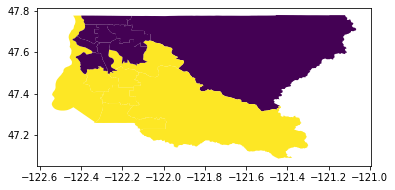

In [20]:
kc_puma.plot(column='SKC') # We are plotting King County and then using the new column that we created `SKC` 
# to establish the boundary for the South of King County. 

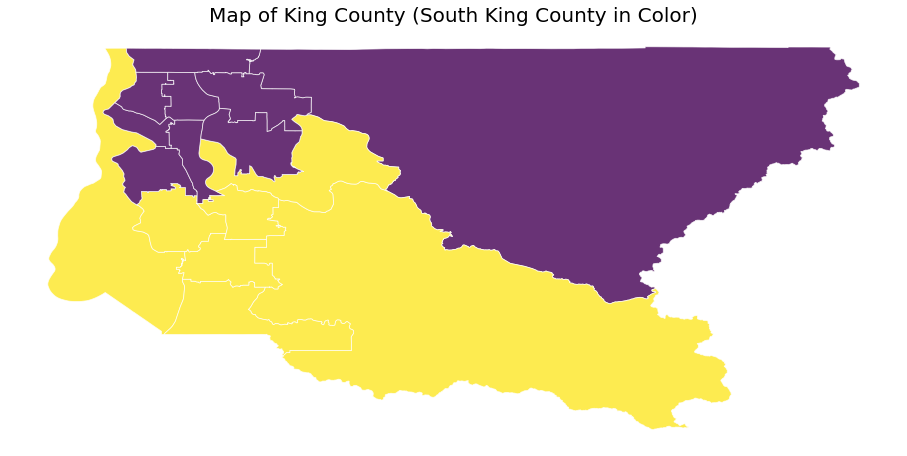

In [21]:

# Plots a map of King County, with South King County and South Seattle in color
fig, ax = plt.subplots(1, figsize=(16, 16))
ax = kc_puma.plot(ax=ax, 
              column='SKC', cmap='viridis', alpha = .8, linewidth=.8, edgecolor='white',  legend = False)
ax.set_title('Map of King County (South King County in Color)', fontsize = 20)
ax.set_axis_off()
fig.tight_layout
plt.show();